<a href="https://colab.research.google.com/github/minghaozou/pytorch-tutorial-with-solutions/blob/main/solutions/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Fri Oct 24 14:46:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


2.8.0+cu126


## 1. What are 3 areas in industry where computer vision is currently being used?

1. Camera and photo apps use computer vision to enhance and sort images.
2. Modern cars use computer vision to avoid other cars and stay within lane lines.
3. Manufactures use computer vision to identify defects in various products.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting occurs when a machine-learning model is trained too closely to the training data-capturing noise of irrelevant details-and therefore fails to generalize well to new, unseen data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. Use more data
Expanding and diversifying the training dataset helps the model learn the true underlying patterns rather than memorizing noise or idiosyncrasies.

2. Regularization
Applying techniques such as adding penalty terms.

3. Reducing model complexity or pruning features.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

train_dataset = datasets.MNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

test_dataset = datasets.MNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 19.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 491kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.63MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 17.7MB/s]


In [4]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

## 6. Visualize at least 5 different samples of the MNIST training dataset.

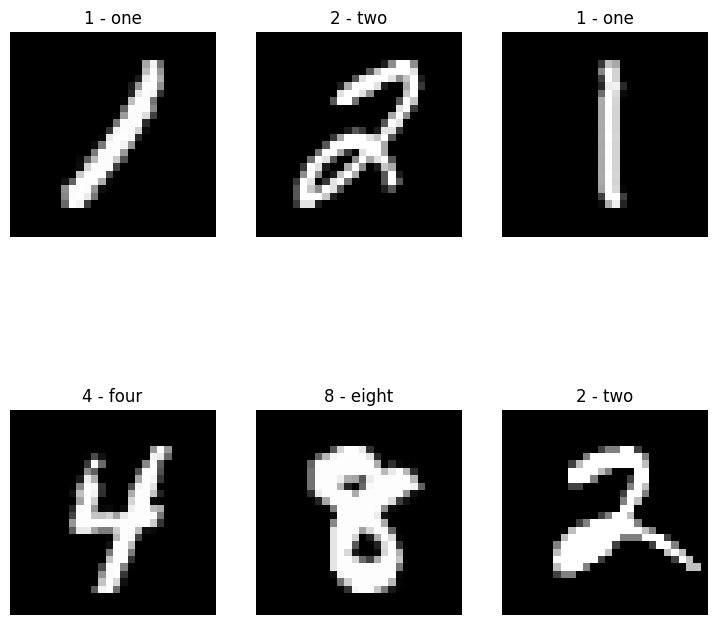

In [6]:
import matplotlib.pyplot as plt
import numpy as np

class_names = train_dataset.classes

torch.manual_seed(11)
fig = plt.figure(figsize=(9,9))
rows, cols = 2, 3
for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(train_dataset), size = [1]).item()
  img, label = train_dataset[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [7]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of Train Dataloaders: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of Test Dataloaders: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c30283ba9f0>, <torch.utils.data.dataloader.DataLoader object at 0x7c2f238751f0>)
Length of Train Dataloaders: 1875 batches of 32
Length of Test Dataloaders: 313 batches of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [8]:
random_idx = torch.randint(0, len(train_dataset), size = [1]).item()
img, label = train_dataset[random_idx]
print(f"Image size: {img.shape}")

Image size: torch.Size([1, 28, 28])


In [14]:
from torch import nn

class MNISTModelV2(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels = hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size=2,
            stride=2
        )
    )
    self.block2 = nn.Sequential(
        nn.Conv2d(hidden_units,hidden_units,3,padding = 1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=10*7*7, out_features=output_shape)
    )

  def forward(self, x):
    x = self.block1(x)
    # print(x.shape)
    x = self.block2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x

torch.manual_seed(42)
model = MNISTModelV2(
    input_shape = 1,
    hidden_units = 10,
    output_shape = len(class_names)
)
model

MNISTModelV2(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [13]:
# random_idx = torch.randint(0, len(train_dataset), size = [1]).item()
# img, label = train_dataset[random_idx]
# img_afterCNN = model(img)

torch.Size([10, 14, 14])
torch.Size([10, 7, 7])


## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [16]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [18]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [22]:
def train_step(model, data_loader, loss_fn, optimizer, accuracy_fn, device):
  train_loss, train_acc = 0, 0
  model.to(device)
  model.train()
  for X, y in data_loader:
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    acc = accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    train_acc += acc

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss = train_loss/len(data_loader)
  train_acc = train_acc/len(data_loader)
  print(f"Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}%")

def test_step(model, data_loader, loss_fn, accuracy_fn, device):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss = loss_fn(y_pred, y)
      test_loss += loss
      acc = accuracy_fn(y_true = y, y_pred=y_pred.argmax(dim=1))
      test_acc += acc

    test_loss = test_loss/len(data_loader)
    test_acc = test_acc/len(data_loader)
    print(f"Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")


In [23]:
def print_time(start, end, device):
  time = end - start
  print(f"Total time on {device}: {time:3f} seconds")
  return time

In [26]:
from timeit import default_timer as timer
from tqdm.auto import tqdm

torch.manual_seed(42)
epochs = 5
device = "cuda" if torch.cuda.is_available() else "cpu"
time_start = timer()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(
      model = model,
      data_loader = train_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
      device = device
      )
  test_step(
      model = model,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device = device
  )
time_end = timer()
total_time = print_time(start=time_start, end = time_end, device=device)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Train Loss: 0.03494 | Train Acc: 98.89%
Test Loss: 0.04145 | Test Acc: 98.72%
Epoch: 1
--------
Train Loss: 0.03254 | Train Acc: 98.93%
Test Loss: 0.02921 | Test Acc: 98.98%
Epoch: 2
--------
Train Loss: 0.03083 | Train Acc: 98.99%
Test Loss: 0.03390 | Test Acc: 98.84%
Epoch: 3
--------
Train Loss: 0.02785 | Train Acc: 99.13%
Test Loss: 0.03394 | Test Acc: 98.92%
Epoch: 4
--------
Train Loss: 0.02735 | Train Acc: 99.13%
Test Loss: 0.03404 | Test Acc: 98.91%
Total time on cuda: 57.492116 seconds


In [27]:
torch.manual_seed(42)
epochs = 5
device = "cpu"
time_start = timer()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(
      model = model,
      data_loader = train_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
      device = device
      )
  test_step(
      model = model,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device = device
  )
time_end = timer()
total_time = print_time(start=time_start, end = time_end, device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Train Loss: 0.02523 | Train Acc: 99.17%
Test Loss: 0.04179 | Test Acc: 98.58%
Epoch: 1
--------
Train Loss: 0.02410 | Train Acc: 99.19%
Test Loss: 0.03244 | Test Acc: 98.94%
Epoch: 2
--------
Train Loss: 0.02296 | Train Acc: 99.27%
Test Loss: 0.04428 | Test Acc: 98.84%
Epoch: 3
--------
Train Loss: 0.02244 | Train Acc: 99.29%
Test Loss: 0.03681 | Test Acc: 98.84%
Epoch: 4
--------
Train Loss: 0.02100 | Train Acc: 99.31%
Test Loss: 0.03605 | Test Acc: 98.91%
Total time on cpu: 179.911827 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [40]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [47]:
def make_predictions(model, data, device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim = 0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)
      pred_probs.append(pred_prob)

  return torch.stack(pred_probs)


In [45]:
import random

random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_dataset), k = 9):
  test_samples.append(sample)
  test_labels.append(label)

print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]}({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 2(2 - two)


In [48]:
pred_probs = make_predictions(model = model, data=test_samples, device=device)
pred_probs[0]

tensor([1.3873e-10, 2.2757e-07, 9.9997e-01, 4.4367e-08, 1.9087e-14, 3.3195e-17,
        5.0972e-14, 2.3570e-08, 2.8192e-05, 5.4356e-11], device='cuda:0')

In [50]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1], device='cuda:0')

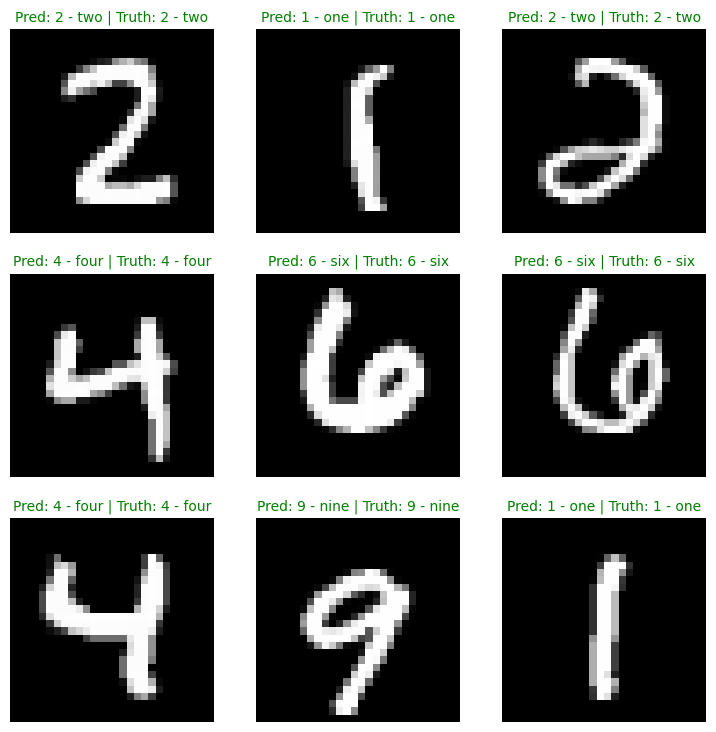

In [52]:
plt.figure(figsize = (9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i + 1)
  plt.imshow(sample.squeeze(), cmap = 'gray')
  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10, c = "g")
  else:
    plt.title(title_text, fontsize = 10, c = "r")
  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?